## 审题
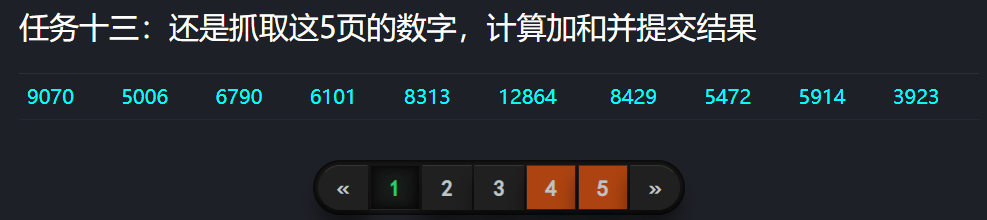
> 抓取五页，并计算加和

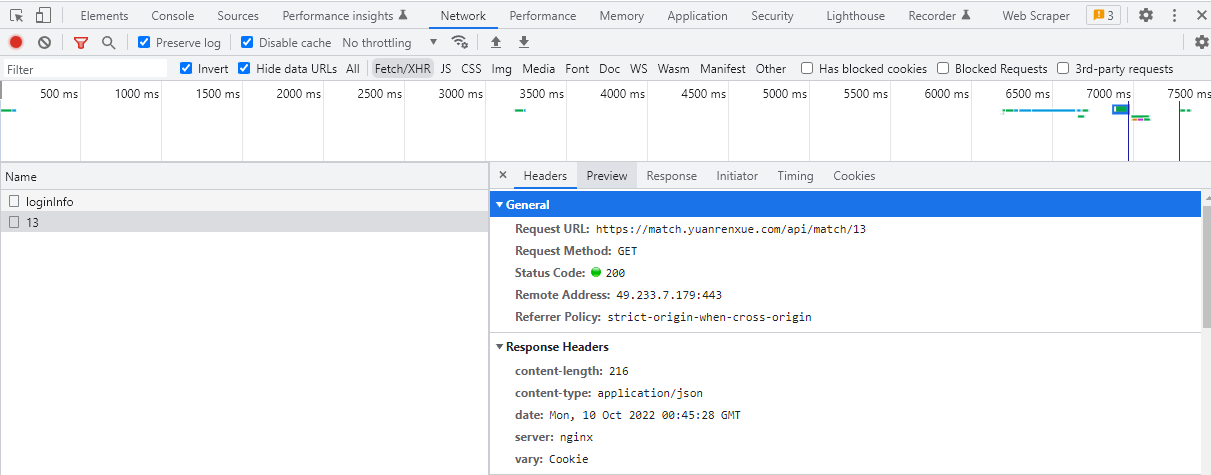  
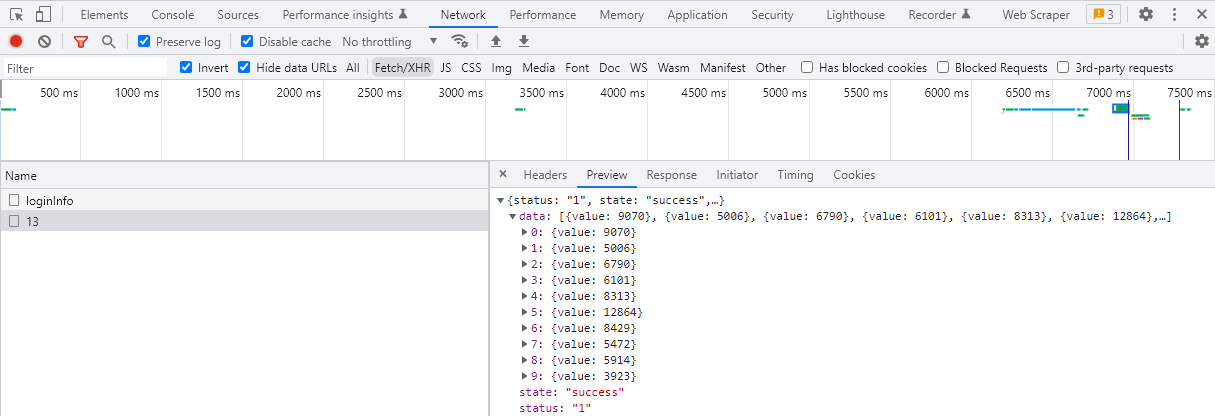
> 找到网络请求，请求发送

In [100]:
! pip install requests
import requests

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [101]:
# 1. 尝试获取数据
session = requests.Session()
url = 'https://match.yuanrenxue.com/api/match/13'
cookies={"sessionid":"7unvdtil9vz9hnxqmmx9r4qqxj2rxl73"}
resp = session.get(url,cookies=cookies,timeout=9)
resp.text

'{"error": "page no found"}'

## 跟踪包
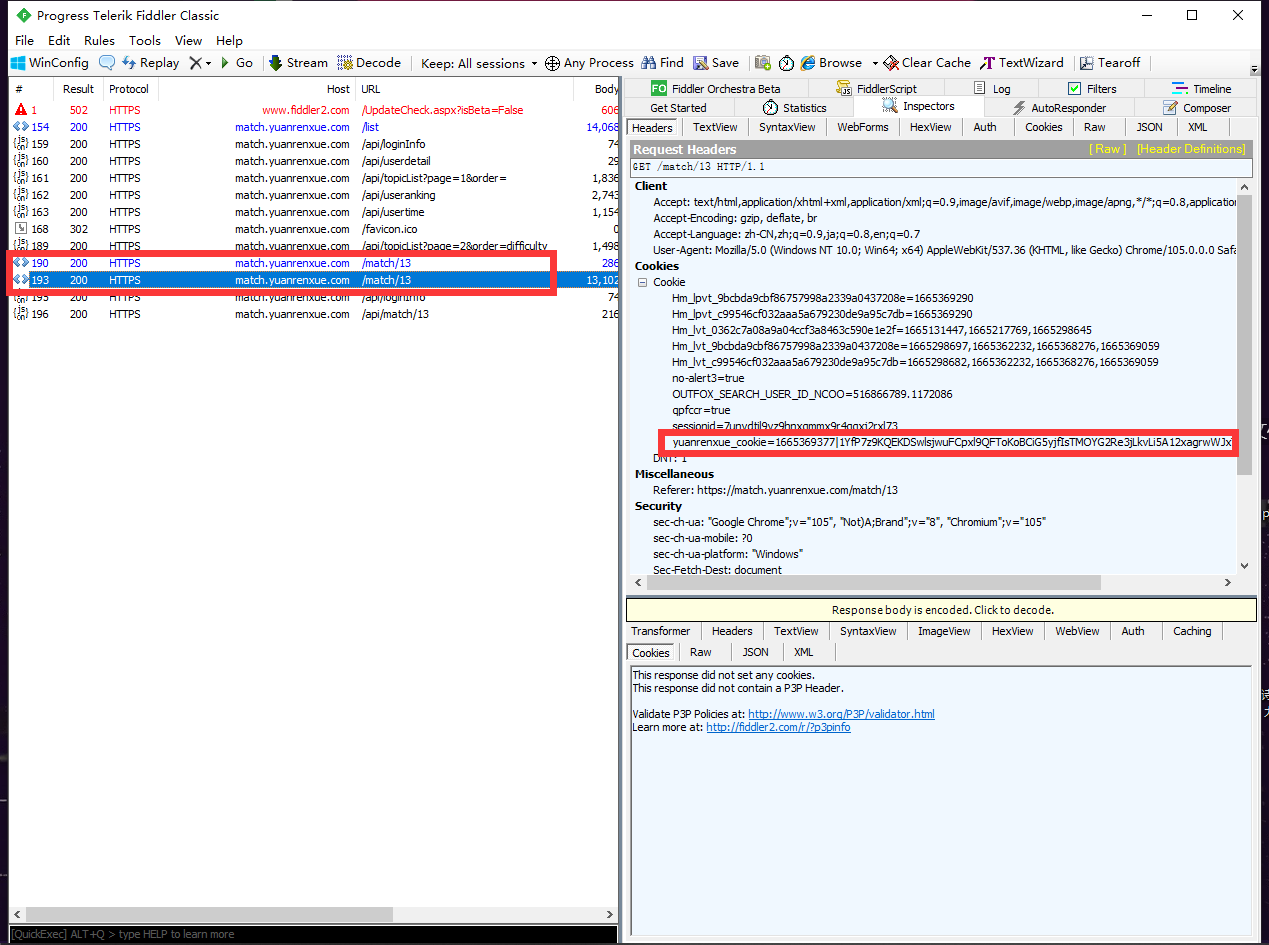
> 发现请求了两次页面，并在第二次请求时多附加了一条cookie值

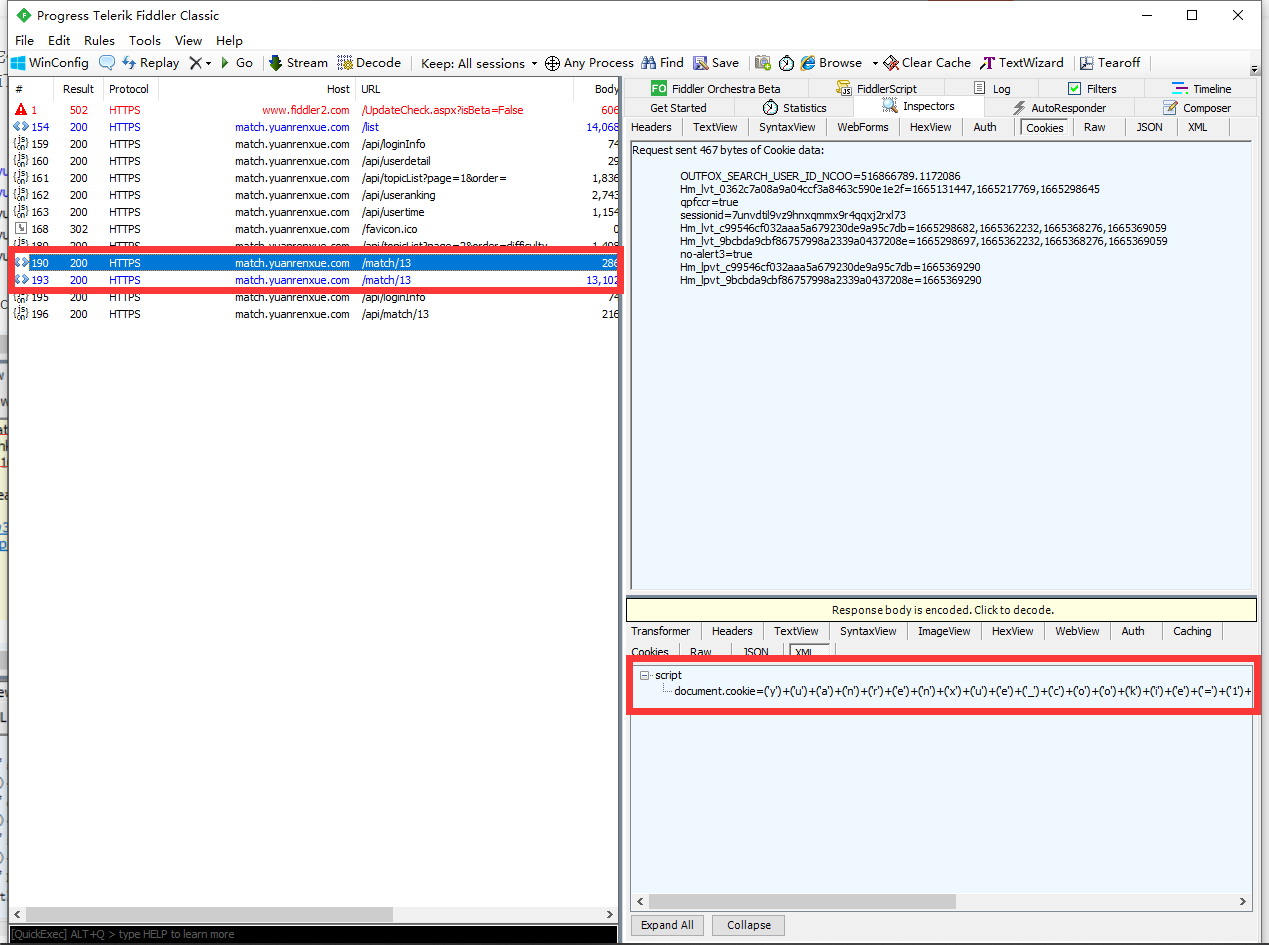
> 发现第一次请求时设置了cookie值

## 新的开始
> 首先模拟第一次请求，得到coockie值  
> 然后模拟第二次请求，传入cookie值

In [102]:
# 2.模拟第一次请求
url = "https://match.yuanrenxue.com/match/13"
resp = session.get(url,cookies=cookies,timeout=9)
resp.text

"<script>document.cookie=('y')+('u')+('a')+('n')+('r')+('e')+('n')+('x')+('u')+('e')+('_')+('c')+('o')+('o')+('k')+('i')+('e')+('=')+('1')+('6')+('6')+('5')+('3')+('7')+('7')+('1')+('8')+('9')+('|')+('5')+('B')+('f')+('B')+('p')+('y')+('l')+('l')+('s')+('a')+('o')+('1')+('R')+('P')+('G')+('9')+('V')+('j')+('0')+('2')+('D')+('U')+('8')+('I')+('e')+('E')+('s')+('l')+('3')+('l')+('r')+('Q')+('L')+('q')+('Q')+('e')+('t')+('0')+('t')+('R')+('L')+('V')+('m')+('J')+('5')+('g')+('k')+('B')+('g')+('r')+('B')+('0')+('U')+('1')+('u')+('b')+('E')+('d')+('n')+('d')+('c')+('B')+('W')+('f')+('Y')+('4')+('M')+('T')+('4')+('3')+('D')+('z')+('F')+('K')+('L')+('S')+('0')+('y')+('2')+('M')+('0')+('R')+('N')+('H')+('0')+('b')+('q')+('V')+('D')+('R')+('o')+('5')+('y')+('B')+('1')+('B')+('s')+('X')+('i')+('a')+('x')+('5')+('A')+('Q')+('Y')+('u')+('K')+('b')+('c')+('f')+('H')+('1')+('J')+('j')+('9')+('f')+('S')+('N')+('J')+('v')+('j')+('9')+('q')+('M')+('3')+('V')+('A')+('2')+('e')+('g')+('2')+('5')+('f')+('b

## 尝试解析cookie
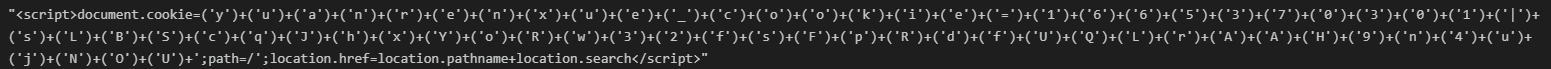
> 返回了一串js代码，放入console中解析

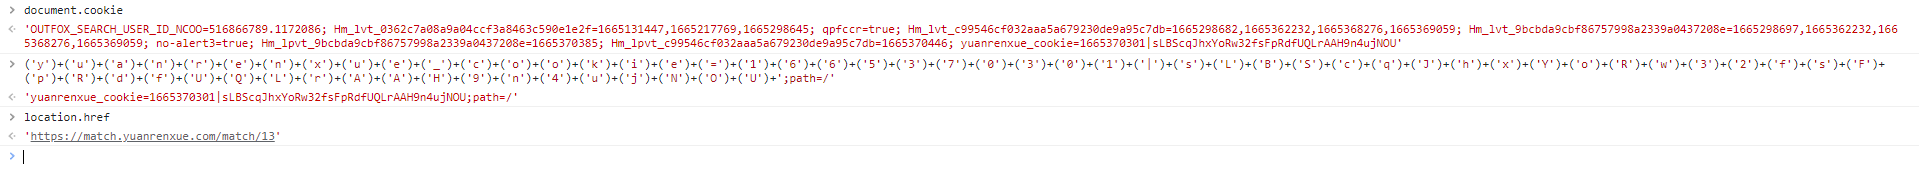
> 可以看出赋值了一串cookie，然后是一个刷新操作  
> 下一步，生成cookie,并模拟第二次访问

In [103]:
# 2.1 生成cookie
import re
js_code = resp.text
js_code = re.findall("\(.*/';",js_code)[0]
js_code = js_code.split(';')[0][:-2] # 去除路径

# 模拟js运行
! pip install pyexecjs
import execjs

js_code = f"function result(){{cookie={js_code} ;return cookie}}" # 将代码包装成js函数
result = execjs.compile(js_code).call('result') # 取js函数的运行返回值

# 格式化参数
result = result.split('=')
r_head = result[0]
r_body = result[1]

# 模拟第二次请求
cookies.update({r_head:r_body})
url = 'https://match.yuanrenxue.com/api/match/13'
resp2 = session.get(url,cookies=cookies,timeout=9)
resp2.json()

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


{'status': '1',
 'state': 'success',
 'data': [{'value': 9070},
  {'value': 5006},
  {'value': 6790},
  {'value': 6101},
  {'value': 8313},
  {'value': 12864},
  {'value': 8429},
  {'value': 5472},
  {'value': 5914},
  {'value': 3923}]}

## 翻页
> 已获取到数据进行翻页操作
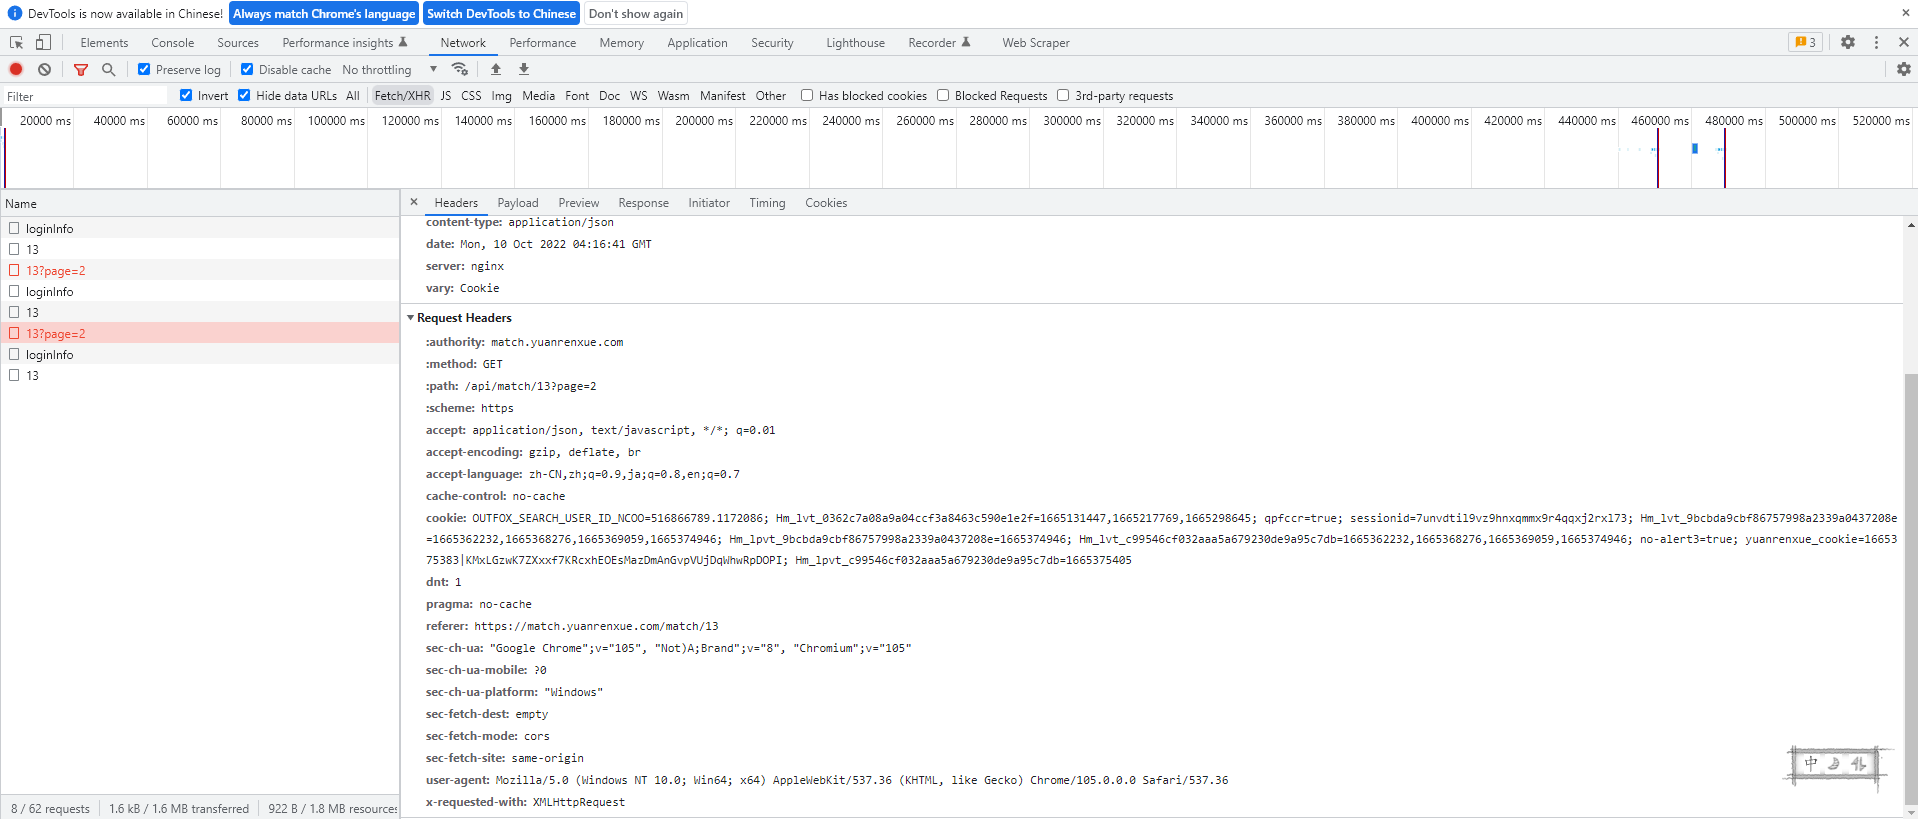
> 尝试获取第二页，但数据拉取失败  
> 猜测是因为动态cookie的原因需要刷新页面
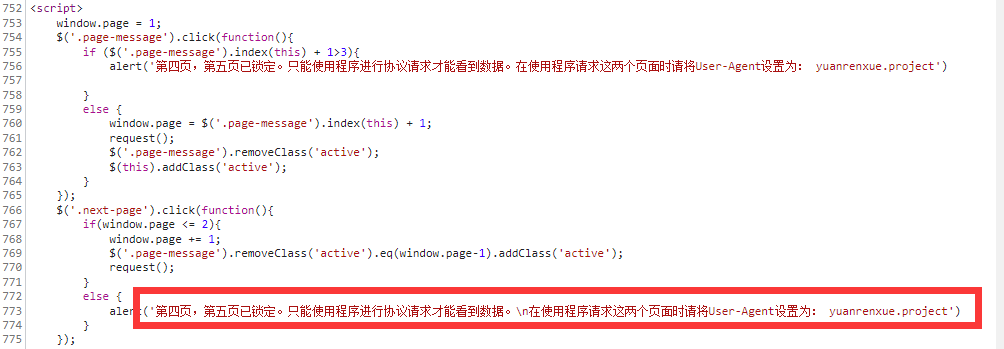
> 根据提示修改请求头并添加页码参数重新请求

In [104]:
# 2.2 翻页访问
session.headers.update({'user-agent':'yuanrenxue.project'})
data = []
for n in range(1,6):
    params = {'page':n}
    resp = session.get(url,params=params,cookies=cookies,timeout=9)
    data.append(resp.json())
data

[{'status': '1',
  'state': 'success',
  'data': [{'value': 9070},
   {'value': 5006},
   {'value': 6790},
   {'value': 6101},
   {'value': 8313},
   {'value': 12864},
   {'value': 8429},
   {'value': 5472},
   {'value': 5914},
   {'value': 3923}]},
 {'status': '1',
  'state': 'success',
  'data': [{'value': 9446},
   {'value': 9952},
   {'value': 4004},
   {'value': 4408},
   {'value': 3251},
   {'value': 12698},
   {'value': 10383},
   {'value': 11558},
   {'value': 9241},
   {'value': 4538}]},
 {'status': '1',
  'state': 'success',
  'data': [{'value': 4898},
   {'value': 12714},
   {'value': 11698},
   {'value': 7509},
   {'value': 3372},
   {'value': 7442},
   {'value': 5582},
   {'value': 10615},
   {'value': 5645},
   {'value': 6537}]},
 {'status': '1',
  'state': 'success',
  'data': [{'value': 10388},
   {'value': 6599},
   {'value': 13027},
   {'value': 8578},
   {'value': 6803},
   {'value': 4024},
   {'value': 7055},
   {'value': 4577},
   {'value': 8308},
   {'value': 5043

In [105]:
# 2.3 加和计算
values = [v['value'] for j in data for v in j['data']]
count = sum(values)
count


371633

In [107]:
# 3.1 提交答案
params = {'answer':count,'id':'13'}

url = "https://match.yuanrenxue.com/api/answers"
resp = session.get(url,cookies=cookies,params=params)
resp.text

'{"user": "sancho", "info": "success", "status_code": "1"}'